<a href="https://colab.research.google.com/github/Evandro72/UsersWordCloudBarplot/blob/main/UsersWordCloudBarplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 16.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=3d60a988bcff61afda5ab95c73f821bbf03b65e3cd619abbeddaa2267d5fcbb6
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [4]:
from PIL import Image
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from langdetect import detect
import random
import pycountry

In [5]:
# Creating Language Dict
Languages = {}

for lang in pycountry.languages:
    try:
        Languages[lang.alpha_2] = lang.name
    except:
        pass

In [6]:
# Tweets were based on these Languages 
Unique_Lang_Code = ['it', 'da', 'zh-cn', 'en', 'lt', 'fr', 'sl', 'hu', 'sq', 'sv', 'uk', 'sk', 'ca', 'lv', 'af', 'th', 'no', 'fi', 'vi', 'de', 'cy', 'ja', 'nl', 'es', 'cs', 'ro', 'tl', 'pl', 'id', 'fa', 'ru', 'et', 'sw', 'tr', 'pt', 'el', 'so', 'hr']

In [7]:
# Reading CSV File
df = pd.read_csv('Tweets.csv')

In [8]:
# Filtering Tweets on Language

Text_Dict = {}

for index, tweet in enumerate(df['Cleaned_Tweet']):
    try:
        languade_2code = detect(tweet)

        if Languages[languade_2code] in Text_Dict.keys():
            Text_Dict[Languages[languade_2code]].append(df.loc[index, 'Cleaned_Tweet'])
        else:
            Text_Dict[Languages[languade_2code]] = []
            Text_Dict[Languages[languade_2code]].append(df.loc[index, 'Cleaned_Tweet'])

    except:
        if 'Unknown' in Text_Dict.keys():
            Text_Dict['Unknown'] = []
            Text_Dict['Unknown'].append(df.loc[index, 'Cleaned_Tweet'])


In [9]:
# Sorting Dictionary 
import operator

def sort_by_values_len(dict):
    dict_len= {key: len(value) for key, value in dict.items()}
    
    sorted_key_list = sorted(dict_len.items(), key=operator.itemgetter(1), reverse=True)
    sorted_dict = [{item[0]: dict[item [0]]} for item in sorted_key_list]
    return sorted_dict

Sorted_Text_Dict = sort_by_values_len(Text_Dict)[0]

In [10]:
# Word Cloud Function
def CreateWordCloud(Key, Text, WCBGColor, maxword):
    # create numpy array for wordcloud mask image
    mask = np.array(Image.open('cloud.png'))

    # create wordcloud object
    wc = WordCloud(background_color=WCBGColor, max_words=int(maxword), mask=mask)

    # generate wordcloud
    wc.generate(Text)

    wc.to_image().save('Output/' + Key + '.png')

In [11]:
# Creating Word Cloud for Each Language in Output Folder
for key in list(Text_Dict.keys())[:10]:    
    text = ' '.join(Text_Dict[key])
    CreateWordCloud(key, text, 'white', 200)

In [12]:
# User Word Cloud
User_List = df['User'].tolist()
CreateWordCloud('User', ' '.join(User_List), 'white', 200)

In [23]:
pd.set_option('display.max_rows', None)

In [24]:
df.User.str.split(expand=True).stack().value_counts()

UmbriaJazz_OFC     4501
jazzsharing         425
umbriajournal_      339
Umbria24            335
Reference_IT        240
Webnotte            200
TarasDolceVita      188
armgra              147
thodra              139
ConadJazz           113
umbriaOn            109
AccorDisaccordi     107
GrooveMasterEdt     103
maurizio_bufi       101
GabryAnton           97
CorriereUmbria       96
jazzconvention       92
LImpiccione          92
allanharris          90
luisaberardi1        88
UmbriaTourism        83
francyguancy         83
gruppocramst         80
minimALessandro      77
MariaAvgoulis        76
edicolaRT            73
EugenioBerto70       70
PerugiaToday         66
raicinque            66
fpugliese_conad      66
UmbriaDomani         65
SanremoAncheNoi      65
CsPagesNet           64
Vadodifritto         64
mmolend              63
PiacereMagazine      62
Vittoria_LM          61
aldostaccioli        61
rominatomai          60
UmbriaJazz44         58
HAGpleasure          57
DavAstolfiGreen 

In [26]:
#number of tweets publishers
xcount = df.User.str.split(expand=True).stack().value_counts()
len(xcount.index)

6277

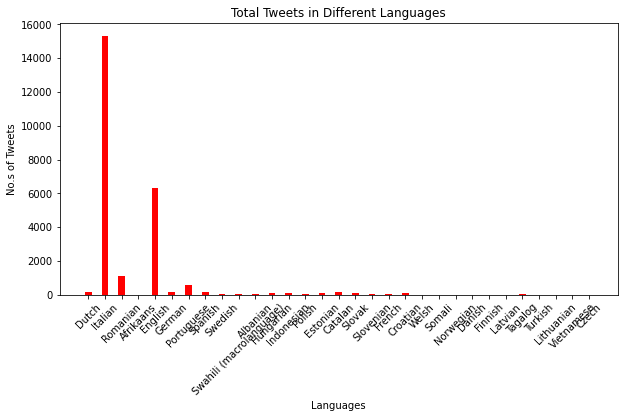

In [ ]:
# Creating Bar Chart
import numpy as np
import matplotlib.pyplot as plt
Lang = list(Text_Dict.keys())
values = [len(item) for item in Text_Dict.values()]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Lang, values, color ='red', width = 0.4)

plt.xticks(rotation=45)
plt.xlabel("Languages")
plt.ylabel("No.s of Tweets")
plt.title("Total Tweets in Different Languages")
plt.show()